/Users/Peyton/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


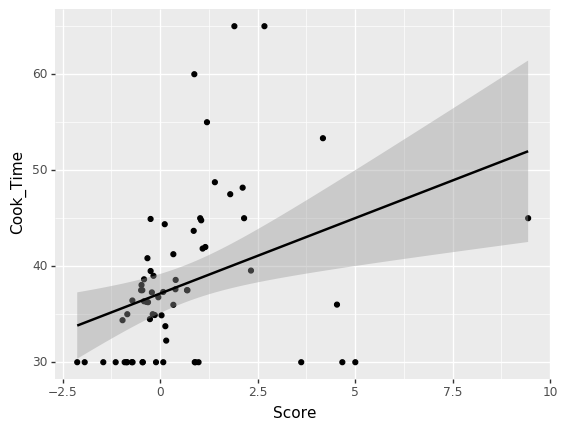

<ggplot: (8767061388409)>
Score and Cook Time Correlation for Main Cuisines
0.3504003589710183
Weak Correlation between 2 variables but the more cook time the better the cuisine scored generally.


,Latitude,Longitude,Rating,Votes,Cook_Time,standardized_rating,standardized_votes,Score
maincuisine,,,,,,,,
Afghan,39.143422,-85.046180,3.500000,26.000000,30.000000,-0.290360,-0.413368,-0.703728
American,39.731584,-85.382594,3.850000,349.833333,37.500000,0.544723,0.158203,0.702926
Andhra,39.689838,-85.226334,3.550000,174.166667,40.833333,-0.171063,-0.151851,-0.322914
Arabian,39.445821,-85.638660,3.685714,400.857143,38.571429,0.152745,0.248261,0.401006
Asian,39.515053,-85.394287,4.236364,629.454545,48.181818,1.466569,0.651739,2.118308
...,...,...,...,...,...,...,...,...
Tamil,39.491887,-85.496424,3.750000,134.000000,30.000000,0.306128,-0.222746,0.083382
Tea,39.558917,-85.497462,3.325000,17.000000,30.000000,-0.707902,-0.429253,-1.137155
Thai,39.466476,-85.590200,4.150000,228.000000,55.000000,1.260509,-0.056835,1.203675


In [28]:
import numpy as np
import pandas as pd
from plotnine import *

foodiex = pd.read_csv('2020-XTern-DS.csv')
foodiex = foodiex.replace('-', np.nan)
foodiex = foodiex.replace('NEW', np.nan)
foodiex = foodiex.dropna(how='any')
foodiex['maincuisine'] = foodiex['Cuisines'].apply(lambda x: x if ',' not in x else x[0:x.index(",")])
foodiex['Cook_Time'] = foodiex['Cook_Time'].apply(lambda x: x[0:x.index(' ')])
foodiex['Cook_Time'] = foodiex['Cook_Time'].apply(lambda x: int(x))
foodiex['Rating'] = foodiex['Rating'].apply(lambda x: float(x))
foodiex['Votes'] = foodiex['Votes'].apply(lambda x: int(x))
ratingmean = foodiex['Rating'].mean()
ratingstd = foodiex['Rating'].std()
foodiex['standardized_rating'] = (foodiex['Rating'] - ratingmean)/ratingstd
votemean = foodiex['Votes'].mean()
votestd = foodiex['Votes'].std()
foodiex['standardized_votes'] = (foodiex['Votes'] - votemean)/votestd
foodiex['Score'] = foodiex['standardized_votes'] + foodiex['standardized_rating']
cooktimecuisine = foodiex.groupby('maincuisine').agg('mean')
plot = ggplot(cooktimecuisine, aes(x='Score', y = 'Cook_Time')) + geom_point() + geom_smooth(method = 'lm')
print(plot)
cooktimecuisine
print('Score and Cook Time Correlation for Main Cuisines')
print(cooktimecuisine['Score'].corr(cooktimecuisine['Cook_Time']))
print('Weak Correlation between 2 variables but the more cook time the better the cuisine scored generally.')
cooktimecuisine